In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# plotting function
def waverad(wave,rad,color):
    plt.figure(figsize=(6,6))
    plt.plot(wave, rad, color=color, markersize = 1)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("radiation(mW/(m2*nm)")
    plt.xlim(left=150)
    
def compare(wave1, wave2, rad1, rad2,color1, color2):
    plt.figure(figsize=(6,6))
    plt.plot(wave1, rad1, color=color1, markersize = 1)
    plt.plot(wave2, rad2, color=color2, markersize = 1)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("radiation(mW/(m2*nm)")

In [34]:
# import data to a pandas dataframe and add columns
kurudz = pd.read_fwf(r'C:\Users\nadia\Desktop\report0\arxeia\kurudz_1.0nm.dat', delimiter='\t', header=None, encoding='latin1',sep='\t', skiprows = 11)
kurudz[0] = kurudz[0].str.strip()
kurudz[['wavelength','radiation']] = kurudz[0].str.split(' ', n=1, expand=True)

atlas_plus = pd.read_fwf(r'C:\Users\nadia\Desktop\report0\arxeia\atlas_plus_modtran', delimiter='\t', header=None, encoding='latin1',sep='\t', skiprows = 6)
atlas_plus[0] = atlas_plus[0].str.strip()
atlas_plus[['wavelength','radiation']] = atlas_plus[0].str.split(' ', n=1, expand=True)

kurudz[['wavelength','radiation']] = kurudz[['wavelength','radiation']].astype(float)
atlas_plus[['wavelength','radiation']] = atlas_plus[['wavelength','radiation']].astype(float)

kurudz = kurudz.drop(kurudz[kurudz.wavelength>2500].index)
# the atlas_plus dataframe doesn't need the above line because the maximum value of the wavelegth is 800.0

In [35]:
kurudz

,0,wavelength,radiation
0,250 6.352968e+01,250.0,63.52968
1,251 4.395971e+01,251.0,43.95971
2,252 2.909898e+01,252.0,29.09898
3,253 3.198302e+01,253.0,31.98302
4,254 4.187484e+01,254.0,41.87484
...,...,...,...
2246,2496 5.108524e+01,2496.0,51.08524
2247,2497 5.148975e+01,2497.0,51.48975
2248,2498 5.113123e+01,2498.0,51.13123
2249,2499 5.136405e+01,2499.0,51.36405


In [36]:
atlas_plus

,0,wavelength,radiation
0,200.00 7.12904,200.00,7.12904
1,200.05 7.02787,200.05,7.02787
2,200.10 7.22708,200.10,7.22708
3,200.15 7.61477,200.15,7.61477
4,200.20 7.63340,200.20,7.63340
...,...,...,...
11996,799.80 1128.05,799.80,1128.05000
11997,799.85 1127.20,799.85,1127.20000
11998,799.90 1126.40,799.90,1126.40000
11999,799.95 1125.67,799.95,1125.67000


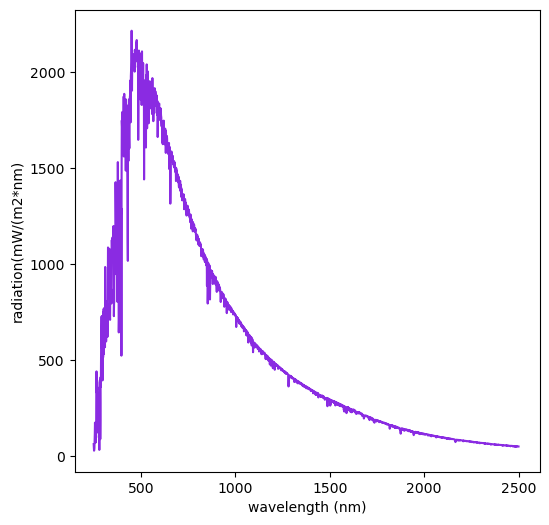

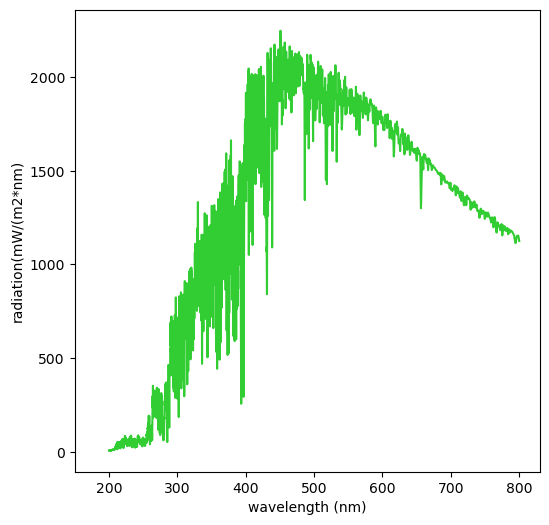

In [37]:
# first graphs
waverad(kurudz['wavelength'],kurudz['radiation'],'blueviolet')
waverad(atlas_plus['wavelength'],atlas_plus['radiation'],'limegreen')

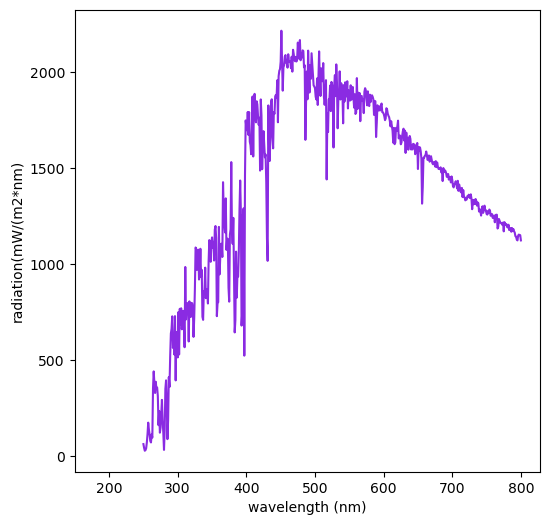

In [38]:
# comparing for wavelengths between 0-800 nm
kurudz = kurudz.drop(kurudz[kurudz.wavelength>800].index)
waverad(kurudz['wavelength'],kurudz['radiation'],'blueviolet')

The atlas_plus dataset contains more detailed data (step = 0.05 vs step = 1) and thus the graph is looking more "busy"
At a first glance, we notice the same peaks (for both highs and lows) and the curve follows the same shape for both graphs.

In [39]:
#finding the average value per 1nm for the atlas dataset
atlas_new_wave = atlas_plus.groupby(atlas_plus.index//20)['wavelength'].mean().reset_index(drop=True)
atlas_new_rad = atlas_plus.groupby(atlas_plus.index//20)['radiation'].mean().reset_index(drop=True)

atlas_new_rad

0         7.600913
1         8.345149
2         8.278676
3         9.478486
4        10.543712
          ...     
596    1150.791500
597    1153.572000
598    1152.629500
599    1135.075500
600    1125.000000
Name: radiation, Length: 601, dtype: float64

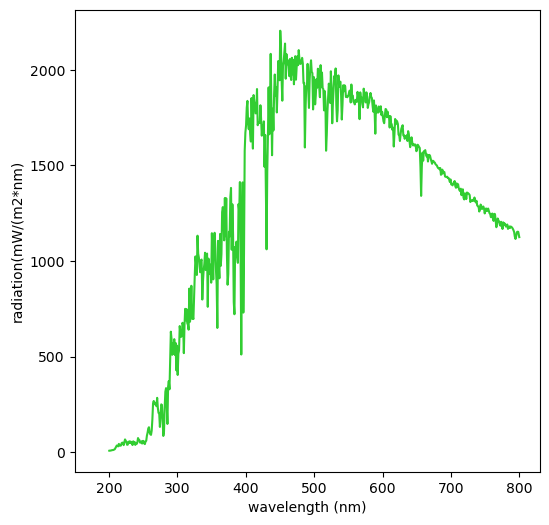

In [40]:
#plotting the second 'new' dataset(with more data) with the average values
waverad(atlas_new_wave,atlas_new_rad,'limegreen')

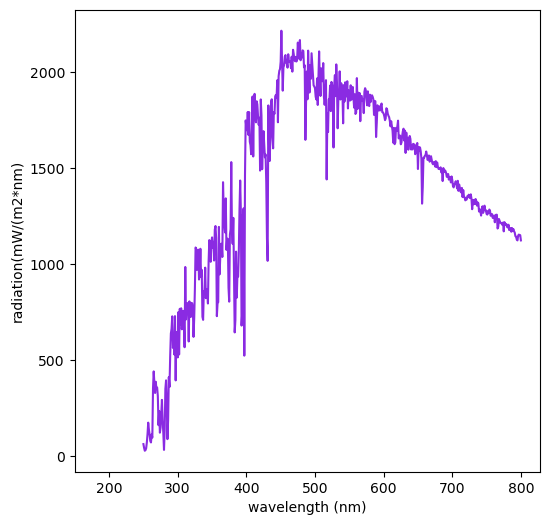

In [41]:
#plotting again the first dataset with the fewer data in order to compare with the graph above
waverad(kurudz['wavelength'],kurudz['radiation'],'blueviolet')

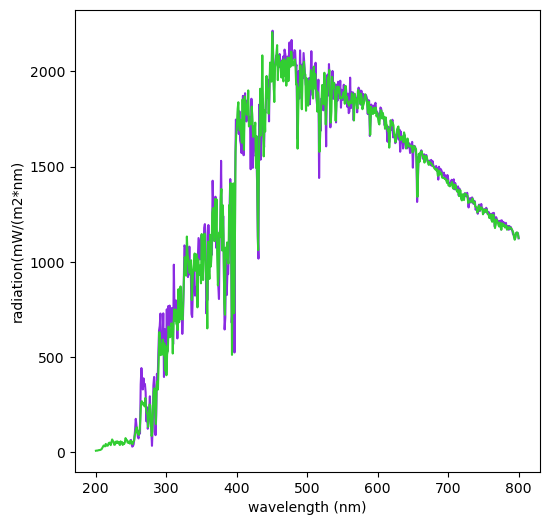

In [42]:
compare(kurudz['wavelength'],atlas_new_wave,kurudz['radiation'],atlas_new_rad,'blueviolet','limegreen')